In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 


from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler






from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score





warnings.filterwarnings("ignore")

In [2]:
placement = pd.read_csv(r'F:/JOB PALCEMENT PREDICTION/Job_Placement_Data.csv')

In [3]:
df = placement.copy()

In [4]:
df.shape

(215, 13)

In [5]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [36]:
df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [7]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [8]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [9]:
category_c = df.dtypes[df.dtypes=='object'].index
category_c

Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation', 'status'],
      dtype='object')

In [10]:
num_c = df.dtypes[df.dtypes!='object'].index
num_c

Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      dtype='object')

# Numerical attribute  analysis 

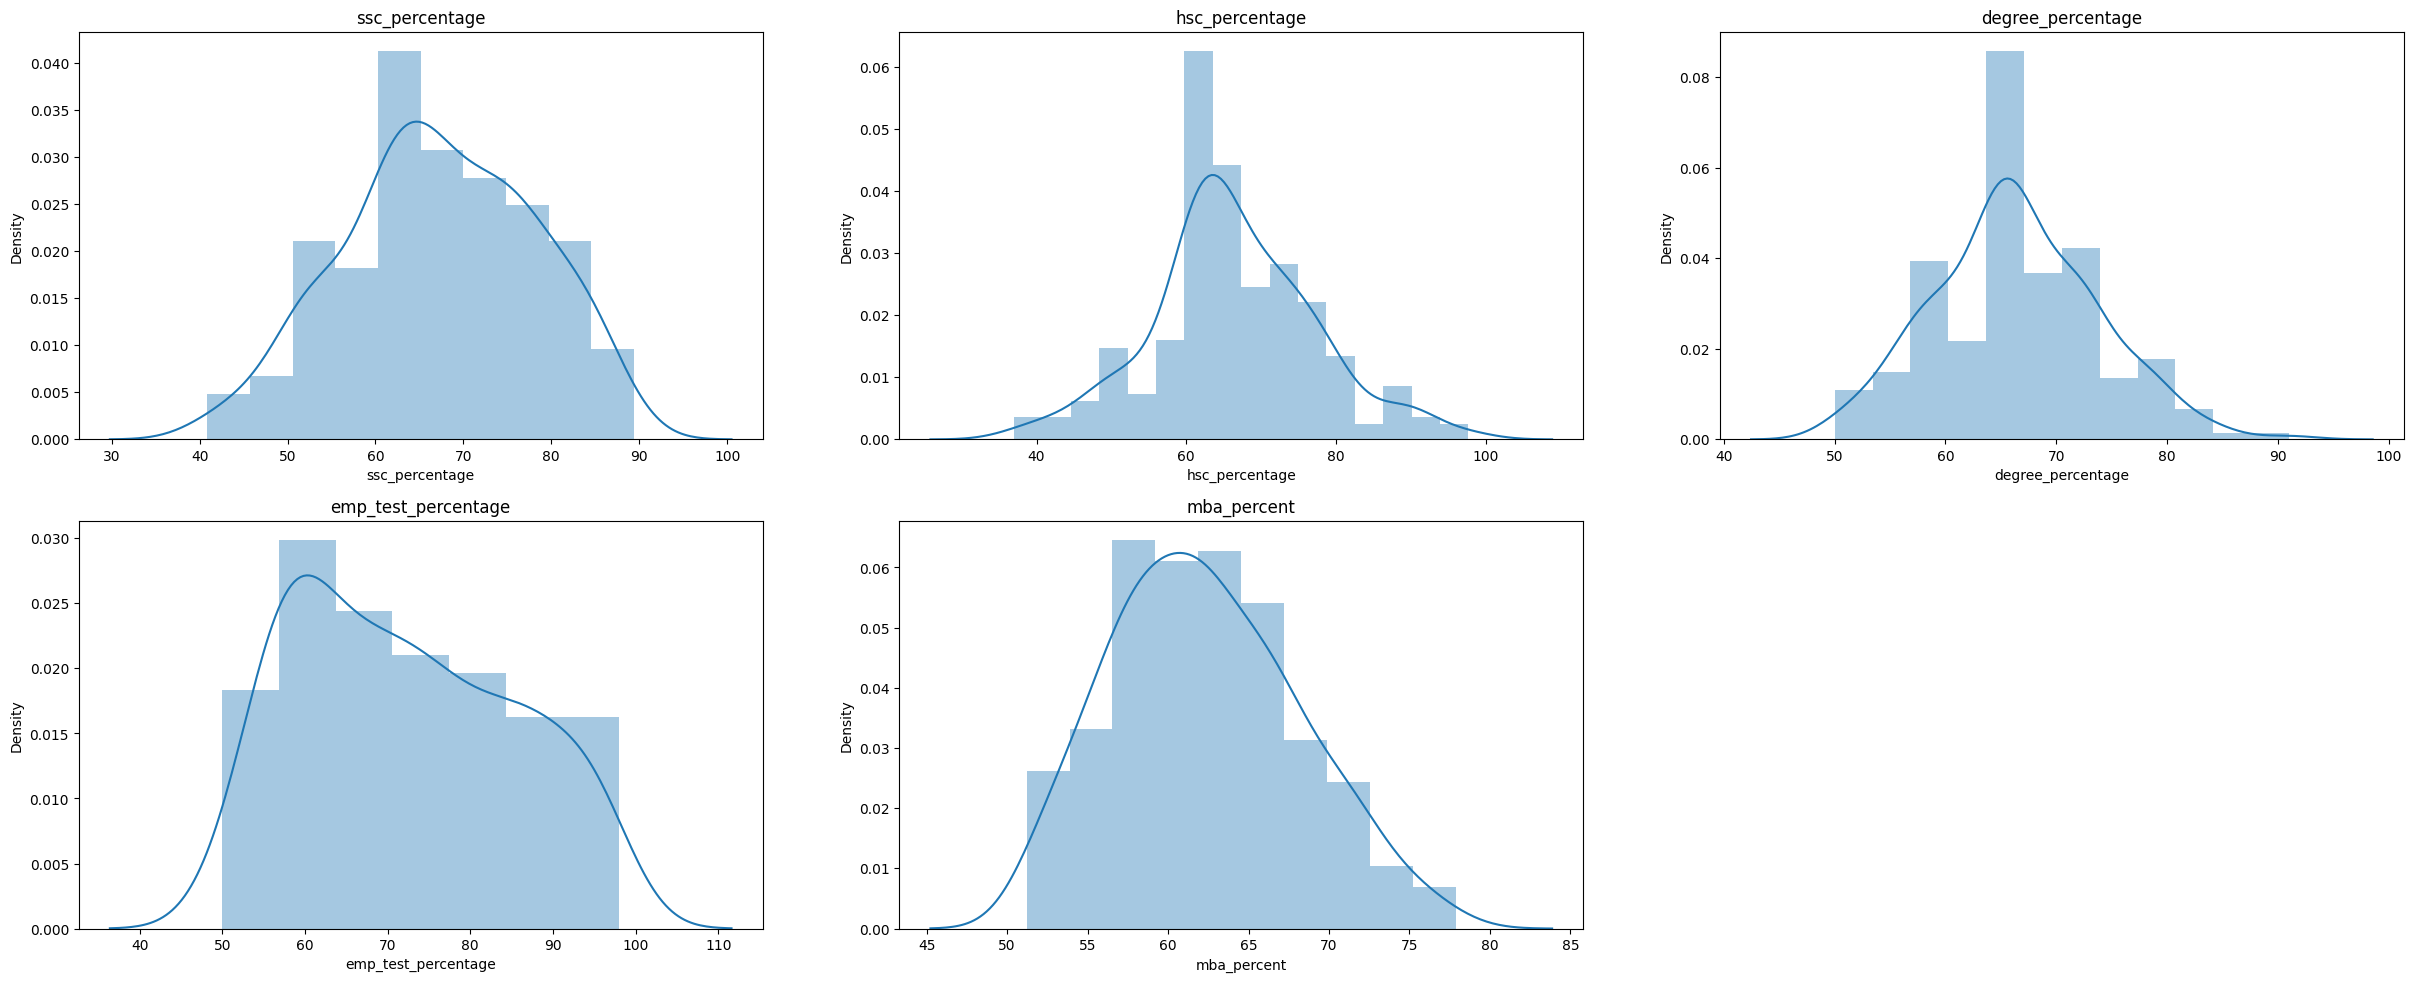

In [11]:
plt.figure(figsize=(30,18))

for i,j in enumerate(num_c):
    plt.subplot(3,3,i+1)
    sns.distplot(df[j])
    plt.title(j)

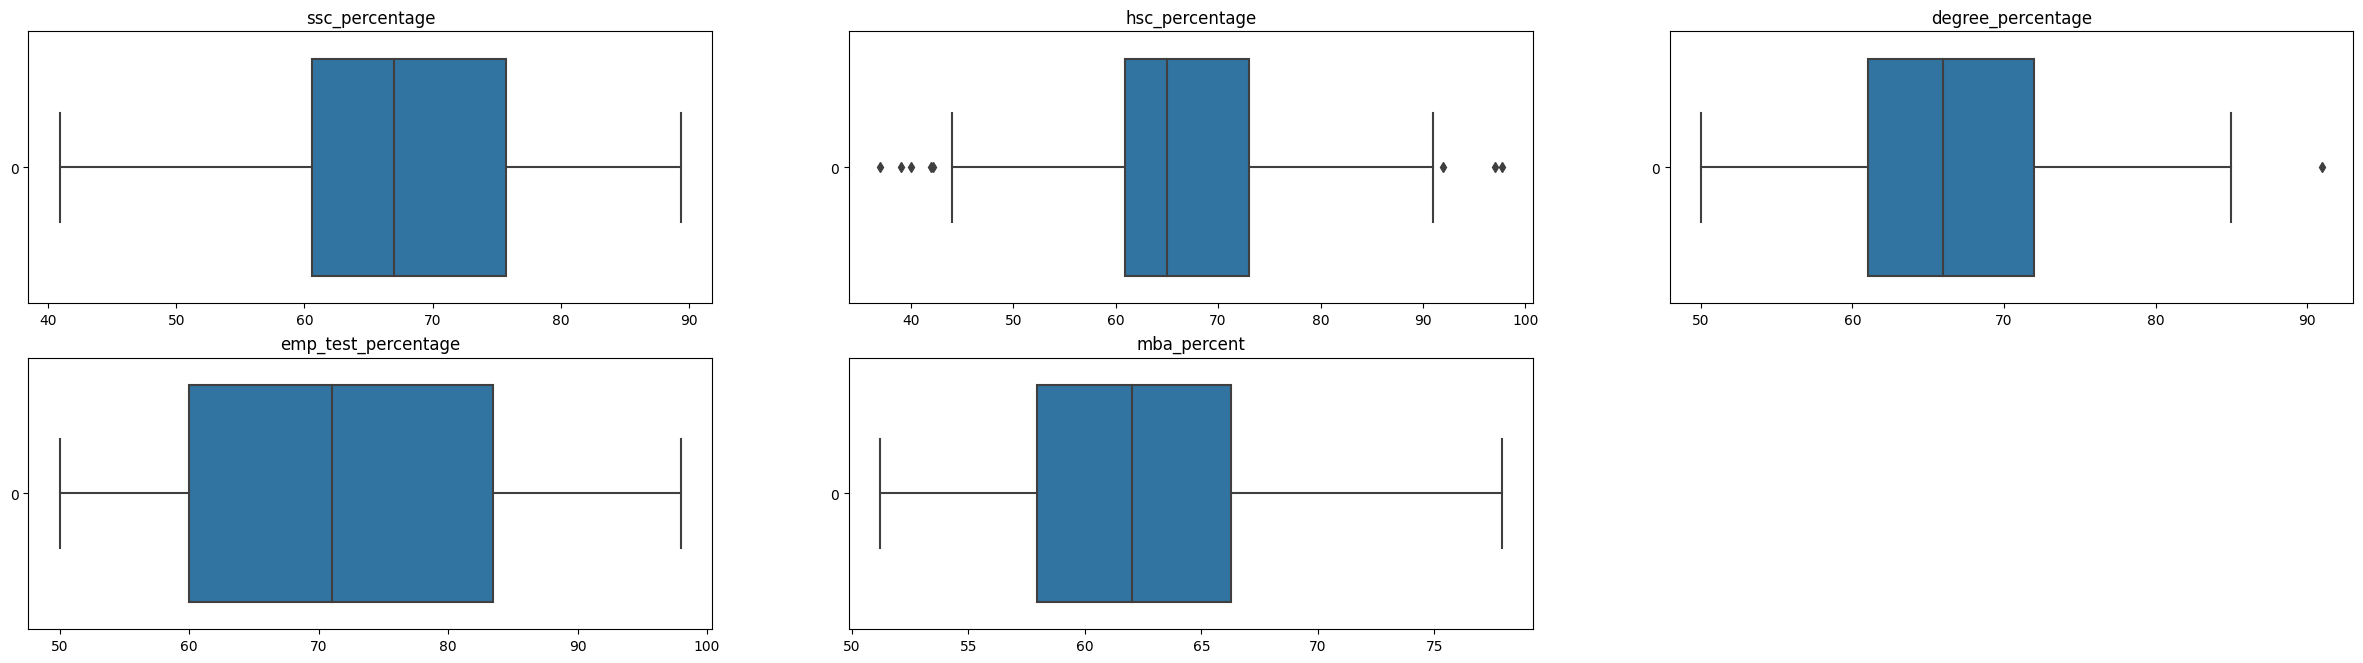

In [12]:
plt.figure(figsize=(30,12))

for i,j in enumerate(num_c):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[j], orient="h")
    plt.title(j)
   

# Categorical data analysis 

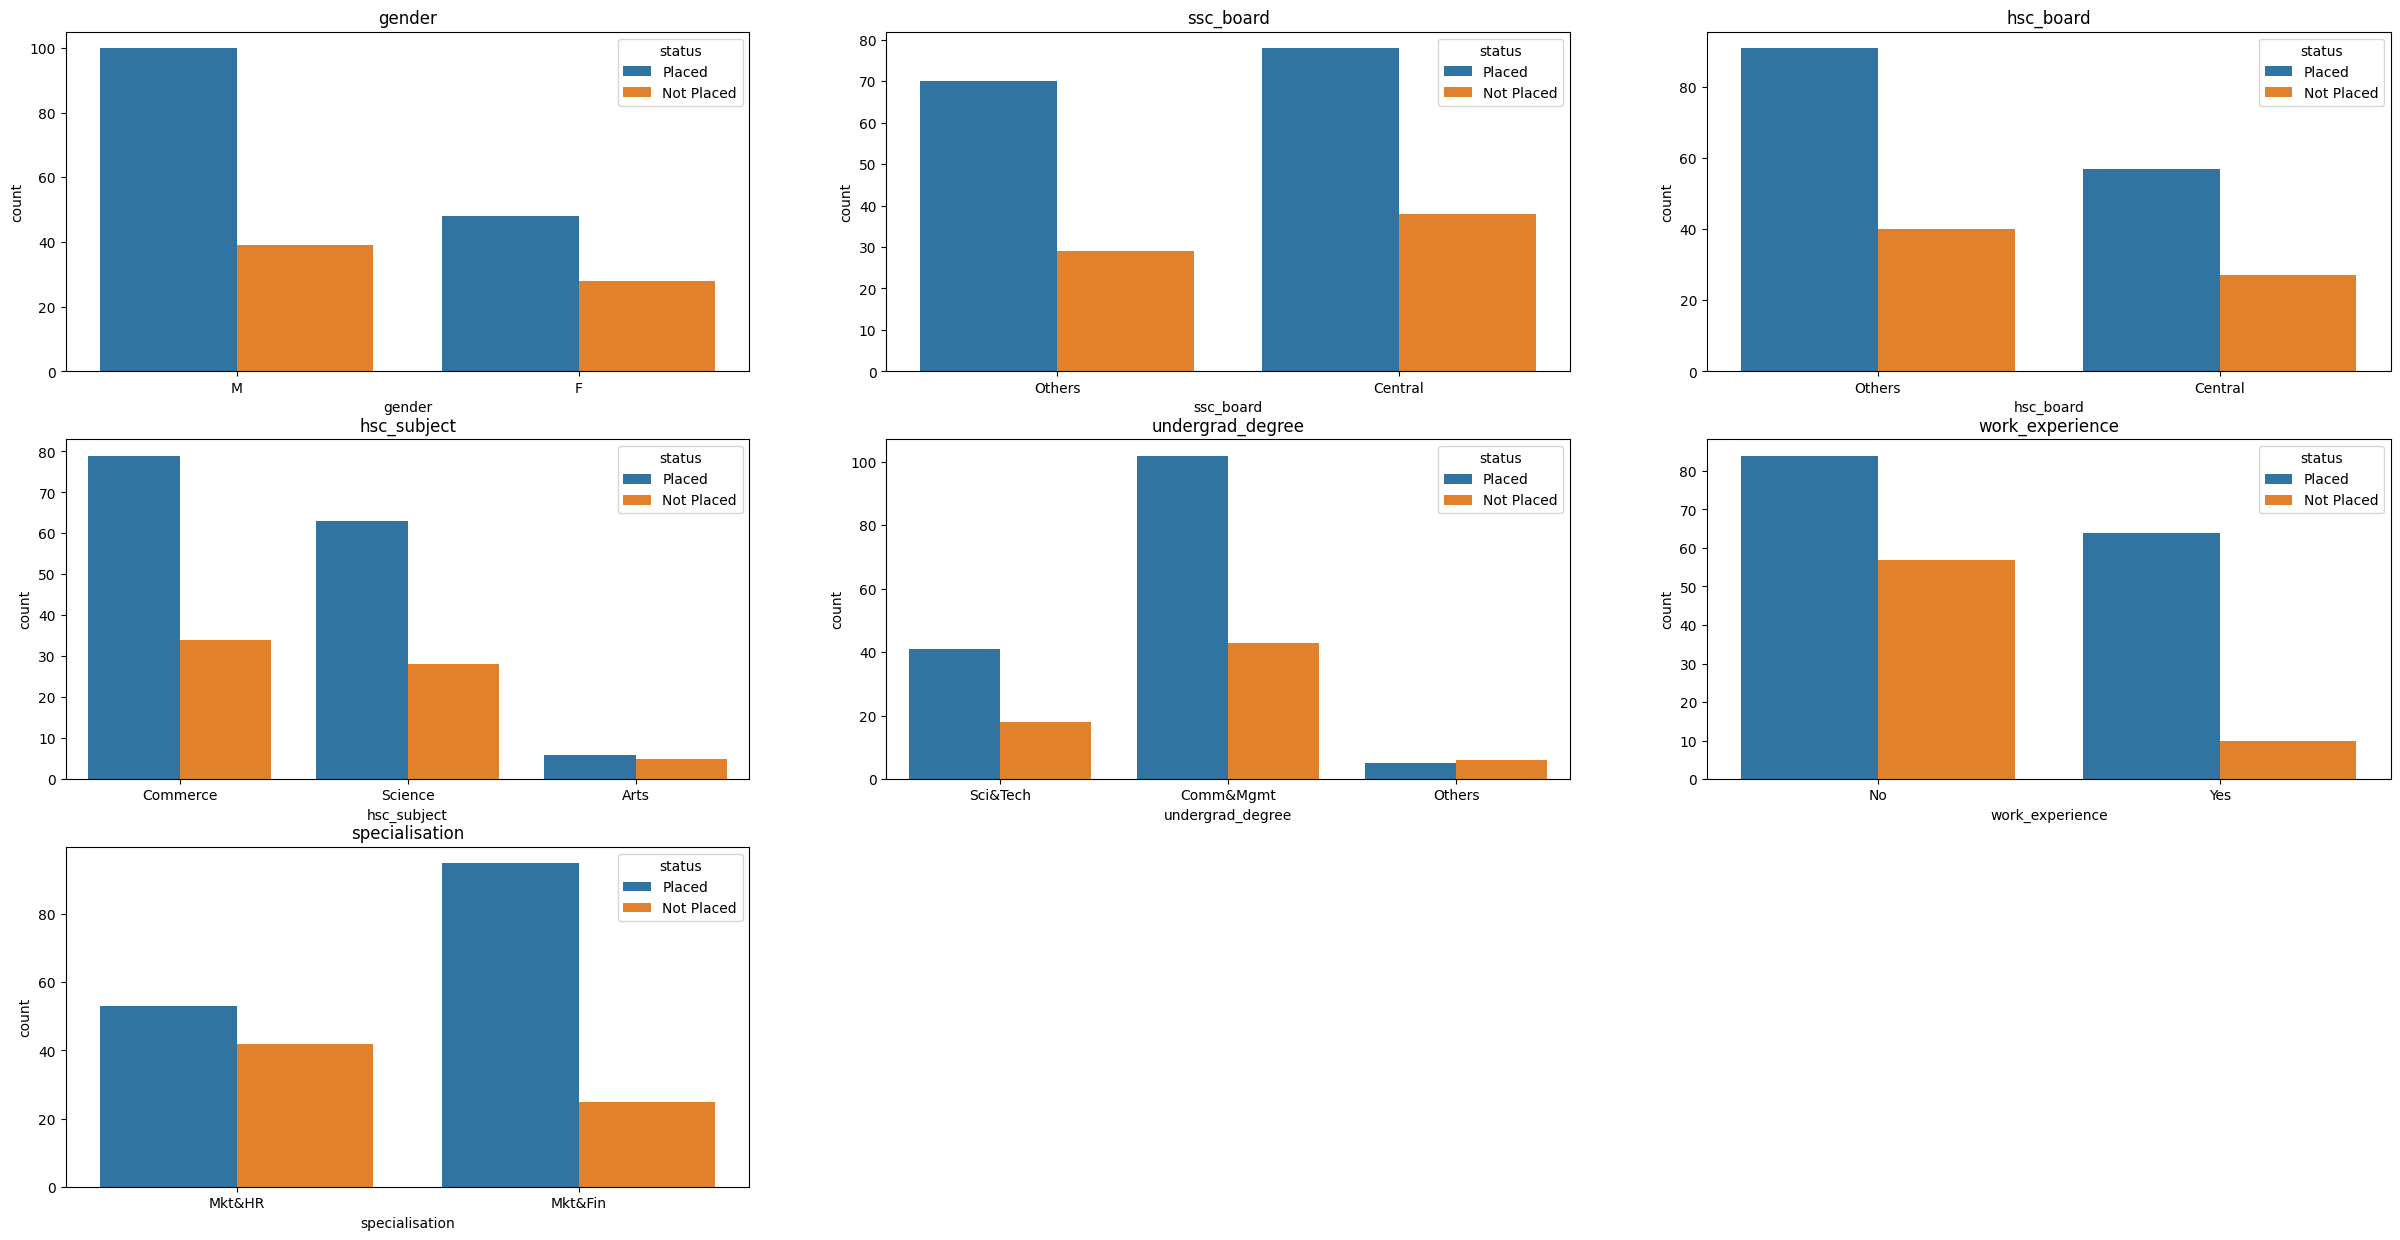

In [13]:
plt.figure(figsize=(30,15))

for i,j in enumerate(category_c):
    if i ==len(category_c)-1:
        pass
    else:
        plt.subplot(3,3,i+1)
        sns.countplot(df, x=j, hue=df['status'])
        plt.title(j)

# Dependent and independent feature selection

In [14]:
x = df.drop(columns='status')
y = df['status']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=25, test_size=0.25)

In [16]:
cat_col= []
num_in = []
for i,j in enumerate(x.columns):
    if df[j].dtype=="object":
        cat_col.append(i)
    else:
        num_in.append(i)


In [17]:
cat_col

[0, 2, 4, 5, 7, 8, 10]

In [18]:
num_in

[1, 3, 6, 9, 11]

In [19]:
# model selection 

logr = LogisticRegression(max_iter=500)
knn = KNeighborsClassifier(n_neighbors=10)
dt = DecisionTreeClassifier(criterion="gini", splitter="random")
randomf = RandomForestClassifier(n_estimators=100, bootstrap=True)
ada = AdaBoostClassifier(n_estimators=100,random_state=20)
grad = GradientBoostingClassifier(n_estimators=100, random_state=20)



In [20]:
model_dic = {"logistic":logr, "knn":knn, "dt":dt, "random":randomf, "ada":ada, "gra":grad}

In [21]:
st1 = ColumnTransformer(transformers=
                        [("enc_col", OneHotEncoder(drop="first", sparse=False),cat_col),
                         
                         ("robust_s", RobustScaler(), [3])
                         
                        ], remainder="passthrough")





In [22]:
tin = Pipeline([("step1", st1),("step2",logr)])
g = tin.fit(x_train, y_train).predict(x_test)
g

array(['Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Not Placed',
       'Not Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed'], dtype=object)

In [23]:

for l in range (5, 31):
    b = 0
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=l, test_size=0.25)
    for i,j in model_dic.items():
        pipe = Pipeline([("step1", st1),("step2",j)])
        g = pipe.fit(x_train, y_train).predict(x_test)
        lk= accuracy_score(y_test, g)
        b = b+lk
        print(i, lk, l )    
    print("total sum of accuracy of                                           ",b)
    print("\n\n\n")


logistic 0.9259259259259259 5
knn 0.8518518518518519 5
dt 0.8148148148148148 5


random 0.8888888888888888 5
ada 0.8888888888888888 5
gra 0.9259259259259259 5
total sum of accuracy of                                            5.296296296296296




logistic 0.8888888888888888 6
knn 0.8518518518518519 6
dt 0.7407407407407407 6
random 0.8148148148148148 6
ada 0.8148148148148148 6
gra 0.8518518518518519 6
total sum of accuracy of                                            4.962962962962963




logistic 0.8518518518518519 7
knn 0.8333333333333334 7
dt 0.6666666666666666 7
random 0.7962962962962963 7
ada 0.8148148148148148 7
gra 0.7962962962962963 7
total sum of accuracy of                                            4.7592592592592595




logistic 0.9074074074074074 8
knn 0.8333333333333334 8
dt 0.8148148148148148 8
random 0.8333333333333334 8
ada 0.9074074074074074 8
gra 0.8703703703703703 8
total sum of accuracy of                                            5.166666666666667




logistic 0.9259259259259259 9
knn 0.8888888888888888 9
dt 0.7962962962962963 9
random 0.90

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=15, test_size=0.25)
pipe_gradient = Pipeline([("step1", st1),("step2",grad)])
pipe_gradient.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc_col',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 2, 4, 5, 7, 8, 10]),
                                                 ('robust_s', RobustScaler(),
                                                  [3])])),
                ('step2', GradientBoostingClassifier(random_state=20))])

In [25]:
pre = pipe_gradient.predict(x_test)
accuracy_score(y_test, pre)

0.9444444444444444

In [26]:
def confusion(ytest,ypred):
    cm= confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

In [27]:
confusion(y_test, pre)

[[16  2]
 [ 1 35]]
              precision    recall  f1-score   support

  Not Placed       0.94      0.89      0.91        18
      Placed       0.95      0.97      0.96        36

    accuracy                           0.94        54
   macro avg       0.94      0.93      0.94        54
weighted avg       0.94      0.94      0.94        54



In [28]:
import pickle

In [29]:
pickle.dump(pipe_gradient,open("appPkl.pkl", "wb") )